In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('./data/heart_disease.csv')

In [8]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [9]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [10]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
y = df['HeartDisease']

In [11]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

## train test 분할하기

In [14]:
# 데이터 분할

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

scale.fit 할 때에는 X전체가 아니라 X_tn을 넣는겁니다...

In [16]:
# 데이터 표준화

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [17]:
# PCA 적용 전 예측 정확도

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth = 4, random_state = 0)
clf_rf.fit(X_tn_std, y_tn)

RandomForestClassifier(max_depth=4, random_state=0)

In [18]:
# 예측

pred_rf = clf_rf.predict(X_te_std)
print(pred_rf)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1]


정확도 확인

In [19]:
# PCA 적용 전 정확도

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.8521739130434782


# 차원 축소 후 머신러닝

In [20]:
# PCA 

from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 주성분 2개를 뽑겠다
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

In [21]:
# 차원 축소 확인

print(X_tn_std.shape)
print(X_tn_pca.shape) # 차원축소 후

(688, 11)
(688, 2)


pca라는 함수를 썼지만, 내부가 어떻게 되었는지 몰라도 우리가 생각한 것과 다를 수 있다.

그래서 공분산 행렬을 확인해본다.

In [22]:
# cov 확인

print(pca.get_covariance())

[[ 0.9735729   0.10997523 -0.18494202  0.13467383 -0.07174325  0.11995984
   0.035195   -0.26720744  0.29424107  0.27716993 -0.29902648]
 [ 0.10997523  0.86876372 -0.11051464  0.02388114 -0.17504918  0.15279762
   0.11691139 -0.19099794  0.14087775  0.08697876 -0.1483497 ]
 [-0.18494202 -0.11051464  0.90499563 -0.09754013  0.10118363 -0.12676552
  -0.05904904  0.23707833 -0.2400065  -0.21221663  0.24548083]
 [ 0.13467383  0.02388114 -0.09754013  0.85326223  0.04332776  0.01345873
  -0.04031441 -0.12169242  0.17664702  0.19447687 -0.17633861]
 [-0.07174325 -0.17504918  0.10118363  0.04332776  1.06000794 -0.23333279
  -0.21748586  0.21095461 -0.08872373  0.01096062  0.10087784]
 [ 0.11995984  0.15279762 -0.12676552  0.01345873 -0.23333279  0.94271789
   0.15770922 -0.22679597  0.15298852  0.08040511 -0.16269479]
 [ 0.035195    0.11691139 -0.05904904 -0.04031441 -0.21748586  0.15770922
   0.89986345 -0.13142788  0.04249652 -0.02728174 -0.05081429]
 [-0.26720744 -0.19099794  0.23707833 -0.

In [23]:
pca.get_covariance().shape

(11, 11)

우리가 데이터 표준화를 했으면 분산이 1이어야 하고 공분산 행렬의 주대각선이 1이 나와야 하는데 1이 아니다...

라이브러리를 썼을때 편하지만, 왜그런지 모르는 것을 모르게 된다는게 문제다.

스스로 만든다면 다 설명할 수 있지만 시간이 오래걸린다.



In [28]:
# 고유값 확인

# 데이터 프레임을 특잇값 분해를 한것
# X^T X의 고유값에 루트취한 것
# 2차원으로 줄였기 때문에 2개
# 각각이 람다1 람다2가 된다

print(pca.singular_values_)

[44.17302547 31.5447107 ]


In [29]:
# 고유벡터 확인

# 위에 해당하는애들의 고유벡터를 뽑는다. 

print(pca.components_)

[[ 0.3220314   0.19267434 -0.27434608  0.16969492 -0.17668292  0.22106568
   0.10317289 -0.41303016  0.4179048   0.36935405 -0.42745521]
 [-0.11370404  0.24937924  0.00061966 -0.25482633 -0.59385394  0.36417721
   0.43083002 -0.13989736 -0.15807412 -0.35442382  0.1373592 ]]


In [31]:
# 설명된 분산

# 람다를 다 더하고 뽑은 두 람다에 각각 나눈것. 람다1에 나눈것 람다2에 나눈것.

print(pca.explained_variance_)

[2.84025645 1.44842616]


In [33]:
# 설명된 분산 비율

print(pca.explained_variance_ratio_)

[0.25782983 0.13148372]


In [34]:
# PCA 적용 후 학습
# 들어가는게 pca로 줄인게 들어간다.

from sklearn.ensemble import RandomForestClassifier
clf_rf_pca = RandomForestClassifier(max_depth = 4, random_state = 0)
clf_rf_pca.fit(X_tn_pca, y_tn)

# 예측

pred_rf_pca = clf_rf_pca.predict(X_te_pca)

In [35]:
# PCA 적용 후 정확도

from sklearn.metrics import accuracy_score
accuracy_pca = accuracy_score(y_te, pred_rf_pca)
print(accuracy_pca)

0.8391304347826087


2% 차이밖에 안난다. !

큰 회사일 수록 라이브러리에 대한 의존도가 낮다.

라이브러리가 업데이트가 되면 안에 함수가 바뀌기도 하는데 서비스를 하고 있을 경우 큰 문제 발생할 수도.

그러니 직접 만들어봅시다.

선형대수의 핵심은 공분산행렬이다.

실제로 공분산행렬 만들기!

넘파이는 행을 피처라고 생각한다. 그래서 옵션을 넣어야 한다.rowvar=0

아니면 .T 해서 전치시켜서 넣던가.



## 핸드메이드 공분산행렬

In [36]:
(1/688)*((X_tn_std.T)@X_tn_std)

array([[ 1.        ,  0.0381725 , -0.03725427,  0.27230563, -0.08939555,
         0.2071084 , -0.02224447, -0.39993483,  0.21013146,  0.26876045,
        -0.27126716],
       [ 0.0381725 ,  1.        , -0.11916638,  0.01943649, -0.18917338,
         0.10892681,  0.05977994, -0.17851352,  0.16582652,  0.10227826,
        -0.14273195],
       [-0.03725427, -0.11916638,  1.        , -0.03297727,  0.06272476,
        -0.0830576 , -0.06411014,  0.27870774, -0.36054444, -0.18082325,
         0.22118665],
       [ 0.27230563,  0.01943649, -0.03297727,  1.        ,  0.10975234,
         0.0806705 ,  0.04283563, -0.13558801,  0.15270691,  0.15556467,
        -0.07242781],
       [-0.08939555, -0.18917338,  0.06272476,  0.10975234,  1.        ,
        -0.27671844, -0.19572181,  0.2448315 , -0.05106301,  0.03000266,
         0.15871787],
       [ 0.2071084 ,  0.10892681, -0.0830576 ,  0.0806705 , -0.27671844,
         1.        ,  0.1314984 , -0.16571987,  0.10391309,  0.05807997,
        -0.201

## 넘파이 공분산행렬 

In [37]:
import numpy as np
np.cov(X_tn_std)

array([[ 0.96740562, -0.14977211,  0.1754639 , ...,  0.47501966,
        -0.72907323,  0.27330941],
       [-0.14977211,  1.11065599,  0.15628087, ..., -0.61227619,
         0.50875462, -0.49018736],
       [ 0.1754639 ,  0.15628087,  0.73689921, ...,  0.17490777,
         0.34038763, -0.44664571],
       ...,
       [ 0.47501966, -0.61227619,  0.17490777, ...,  1.03362366,
        -0.54522845,  0.14923161],
       [-0.72907323,  0.50875462,  0.34038763, ..., -0.54522845,
         1.98786887, -0.76739353],
       [ 0.27330941, -0.49018736, -0.44664571, ...,  0.14923161,
        -0.76739353,  0.73052811]])

In [38]:
np.cov(X_tn_std).shape

(688, 688)

In [39]:
np.cov(X_tn_std.T) # = rowvar = 0 이라는 옵션을 넣어준것과 같음.

array([[ 1.0014556 ,  0.03822807, -0.0373085 ,  0.272702  , -0.08952568,
         0.20740987, -0.02227685, -0.40051698,  0.21043733,  0.26915166,
        -0.27166201],
       [ 0.03822807,  1.0014556 , -0.11933984,  0.01946478, -0.18944875,
         0.10908536,  0.05986695, -0.17877336,  0.1660679 ,  0.10242714,
        -0.14293971],
       [-0.0373085 , -0.11933984,  1.0014556 , -0.03302527,  0.06281606,
        -0.0831785 , -0.06420346,  0.27911343, -0.36106925, -0.18108645,
         0.22150861],
       [ 0.272702  ,  0.01946478, -0.03302527,  1.0014556 ,  0.1099121 ,
         0.08078792,  0.04289798, -0.13578538,  0.15292919,  0.15579111,
        -0.07253324],
       [-0.08952568, -0.18944875,  0.06281606,  0.1099121 ,  1.0014556 ,
        -0.27712123, -0.19600671,  0.24518788, -0.05113734,  0.03004634,
         0.1589489 ],
       [ 0.20740987,  0.10908536, -0.0831785 ,  0.08078792, -0.27712123,
         1.0014556 ,  0.13168981, -0.16596109,  0.10406435,  0.05816451,
        -0.201

In [40]:
np.cov(X_tn_std.T).shape

(11, 11)

라이브러리를 쓸 때는 내가 생각한 것과 다를 수도 있음을 항상 주의하자.

미세하게 다른 차이! numpy는 n-1로 나누었고 우리는 n으로 나누었다.

만약 넘파이로 할 때 우리가 한 것처럼 구하려면 bias = 1 즉 n으로 나누도록 한다.

n으로 나누면 bias가 1이 생기는 것이라 그런것이다. 

In [41]:
np.cov(X_tn_std, rowvar = 0, bias = 1)

array([[ 1.        ,  0.0381725 , -0.03725427,  0.27230563, -0.08939555,
         0.2071084 , -0.02224447, -0.39993483,  0.21013146,  0.26876045,
        -0.27126716],
       [ 0.0381725 ,  1.        , -0.11916638,  0.01943649, -0.18917338,
         0.10892681,  0.05977994, -0.17851352,  0.16582652,  0.10227826,
        -0.14273195],
       [-0.03725427, -0.11916638,  1.        , -0.03297727,  0.06272476,
        -0.0830576 , -0.06411014,  0.27870774, -0.36054444, -0.18082325,
         0.22118665],
       [ 0.27230563,  0.01943649, -0.03297727,  1.        ,  0.10975234,
         0.0806705 ,  0.04283563, -0.13558801,  0.15270691,  0.15556467,
        -0.07242781],
       [-0.08939555, -0.18917338,  0.06272476,  0.10975234,  1.        ,
        -0.27671844, -0.19572181,  0.2448315 , -0.05106301,  0.03000266,
         0.15871787],
       [ 0.2071084 ,  0.10892681, -0.0830576 ,  0.0806705 , -0.27671844,
         1.        ,  0.1314984 , -0.16571987,  0.10391309,  0.05807997,
        -0.201

n-1을 하면 바이아스는 1이 없지만 효율성이 떨어진다

n을 하면 편향이 1이 있지만 효율성이 낫다.

공식문서를 보니 이 모델에서 코베리언스는 noise variance를 포함한다고 하는데, 그것에 대해서는 모르는 것이다.....

소스코드를 까도 ....? 싶은 것이다. 

근데 파이썬은 이정도도 잘되있는 것이다. 

# 고윳값 분해, 특이값 분해

차원 축소 후 머신러닝


In [42]:
u, s, vh = np.linalg.svd(X_tn_std)

# h 붙은건 Transpose 됐다는 것

In [43]:
v = np.transpose(vh) # 원래 v

In [44]:
s # 특잇값(고윳값에 루트를 취한 것)

array([44.17302547, 31.5447107 , 28.48301371, 26.36355891, 24.81613688,
       23.7624007 , 23.50809329, 20.49751641, 19.2731452 , 18.00370448,
       16.32474418])

In [45]:
v # 고유벡터

array([[-3.22031399e-01,  1.13704044e-01, -5.26178404e-01,
         1.41742713e-01, -1.48845897e-02, -2.51617409e-01,
         3.09955807e-01,  2.79955868e-01,  3.15258391e-01,
        -3.95344945e-01, -3.04542638e-01],
       [-1.92674336e-01, -2.49379236e-01,  2.28515748e-01,
         1.03844223e-01,  8.77752606e-01,  1.13789914e-01,
         3.22077171e-02,  2.03598649e-01,  9.26662168e-02,
        -1.99006183e-04, -5.66474312e-02],
       [ 2.74346082e-01, -6.19661406e-04, -4.35655100e-01,
         3.59538311e-01,  8.64828877e-02,  5.19983538e-01,
         3.20858719e-01,  8.12606545e-02, -4.59288747e-01,
         3.29779668e-02,  7.88745846e-02],
       [-1.69694921e-01,  2.54826330e-01, -5.34954305e-01,
        -4.00511223e-01,  3.44737045e-01,  5.00249633e-02,
        -2.59931577e-01, -4.97135286e-01, -4.61923808e-02,
         1.46512712e-01, -5.29819504e-03],
       [ 1.76682920e-01,  5.93853941e-01,  1.02217145e-02,
        -2.62200196e-01,  8.15766427e-02,  4.18033299e-02,
  

### $ X^TX $ 먼저 구하기

대칭행렬인 상황에서는 고윳값분해든 특잇값분해든 뭘 쓰든 상관이 없음

In [46]:
# 특이값 분해

X_tn_std_t = np.transpose(X_tn_std)
XtX = X_tn_std_t.dot(X_tn_std)

In [47]:
u2, s2, vh2 = np.linalg.svd(XtX)

In [48]:
s2

array([1951.2561796 ,  995.06877299,  811.28206973,  695.03723839,
        615.84064945,  564.65168722,  552.63045002,  420.14817906,
        371.45412606,  324.133375  ,  266.49727248])

고유값이 엄청 큰 이유는 같은 것들을 곱했기 때문이다. 

여기에 루트를 취하면 특잇값이 된다.

In [49]:
u2

array([[-3.22031399e-01,  1.13704044e-01, -5.26178404e-01,
         1.41742713e-01, -1.48845897e-02,  2.51617409e-01,
         3.09955807e-01, -2.79955868e-01,  3.15258391e-01,
         3.95344945e-01, -3.04542638e-01],
       [-1.92674336e-01, -2.49379236e-01,  2.28515748e-01,
         1.03844223e-01,  8.77752606e-01, -1.13789914e-01,
         3.22077171e-02, -2.03598649e-01,  9.26662168e-02,
         1.99006183e-04, -5.66474312e-02],
       [ 2.74346082e-01, -6.19661406e-04, -4.35655100e-01,
         3.59538311e-01,  8.64828877e-02, -5.19983538e-01,
         3.20858719e-01, -8.12606545e-02, -4.59288747e-01,
        -3.29779668e-02,  7.88745846e-02],
       [-1.69694921e-01,  2.54826330e-01, -5.34954305e-01,
        -4.00511223e-01,  3.44737045e-01, -5.00249633e-02,
        -2.59931577e-01,  4.97135286e-01, -4.61923808e-02,
        -1.46512712e-01, -5.29819504e-03],
       [ 1.76682920e-01,  5.93853941e-01,  1.02217145e-02,
        -2.62200196e-01,  8.15766427e-02, -4.18033299e-02,
  

### $ XX^T $ 구하기



In [50]:
XXt = X_tn_std.dot(X_tn_std_t)

In [51]:
u3, s3, vh3 = np.linalg.svd(XXt)

In [52]:
u3

array([[-0.04213585, -0.00703311, -0.02840134, ..., -0.05194362,
         0.08513693,  0.0194731 ],
       [ 0.05040742, -0.03913845, -0.00164044, ...,  0.01518247,
         0.00067741,  0.0279629 ],
       [ 0.01337688,  0.03999803,  0.00928875, ..., -0.03955767,
        -0.0645194 ,  0.06702725],
       ...,
       [-0.04446282,  0.04622683, -0.00873971, ...,  0.0576754 ,
        -0.07170578,  0.05616322],
       [ 0.0813654 ,  0.0624038 ,  0.03016634, ..., -0.02368949,
         0.03252149,  0.02217879],
       [-0.05023728, -0.01911619,  0.01394691, ..., -0.04287521,
        -0.04867116, -0.03502609]])

위의 값들은 이론상 0이 나와야 하지만 0이 아닌것이당...

In [53]:
s3

array([1.95125618e+03, 9.95068773e+02, 8.11282070e+02, 6.95037238e+02,
       6.15840649e+02, 5.64651687e+02, 5.52630450e+02, 4.20148179e+02,
       3.71454126e+02, 3.24133375e+02, 2.66497272e+02, 1.73306363e-12,
       1.50454199e-12, 1.29368799e-12, 1.02122674e-12, 9.27360496e-13,
       9.08363475e-13, 7.43995308e-13, 7.32221550e-13, 6.60930529e-13,
       6.46363054e-13, 6.27205083e-13, 5.76429623e-13, 5.12922948e-13,
       5.09068108e-13, 4.35233120e-13, 4.23174675e-13, 3.63250506e-13,
       3.53255673e-13, 2.92184314e-13, 2.88000222e-13, 2.81628451e-13,
       2.71870682e-13, 2.48549805e-13, 2.14828100e-13, 1.63658971e-13,
       1.59549669e-13, 1.59549669e-13, 1.59549669e-13, 1.59549669e-13,
       1.59549669e-13, 1.59549669e-13, 1.59549669e-13, 1.59549669e-13,
       1.59549669e-13, 1.59549669e-13, 1.59549669e-13, 1.59549669e-13,
       1.59549669e-13, 1.59549669e-13, 1.59549669e-13, 1.59549669e-13,
       1.59549669e-13, 1.59549669e-13, 1.59549669e-13, 1.59549669e-13,
      

이 값들도 실제로는 상위 11개 값만 고윳값인 것 나머지는 0

# 코사인 유사도

In [54]:
X_tn_std

array([[ 0.0485459 , -1.91014362,  0.22050645, ..., -0.82592469,
        -0.83982099,  1.03147389],
       [ 1.11222687,  0.52352084, -0.83302438, ...,  1.21076415,
         0.11206837, -0.59617298],
       [-0.58966268, -1.91014362, -0.83302438, ...,  1.21076415,
         0.11206837, -0.59617298],
       ...,
       [ 0.3676502 , -1.91014362, -0.83302438, ..., -0.82592469,
        -0.83982099,  1.03147389],
       [ 1.11222687,  0.52352084, -0.83302438, ...,  1.21076415,
         2.96773644, -2.22381986],
       [-0.69603077,  0.52352084,  1.27403729, ..., -0.82592469,
        -0.83982099,  1.03147389]])

In [55]:
X_tn_std[0]

array([ 0.0485459 , -1.91014362,  0.22050645, -0.1308378 ,  0.49219339,
       -0.52126676,  1.58061258,  0.70404043, -0.82592469, -0.83982099,
        1.03147389])

In [56]:
X_tn_std[1]

array([ 1.11222687,  0.52352084, -0.83302438,  0.61885265, -1.89657423,
       -0.52126676,  1.58061258, -0.60263282,  1.21076415,  0.11206837,
       -0.59617298])

In [58]:
# 데이터 전체를 넣으면 모든 행에 대해 구한다.

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X_tn_std)

array([[ 1.        , -0.14511224,  0.20519655, ...,  0.45542885,
        -0.52420908,  0.32540364],
       [-0.14511224,  1.        ,  0.15192416, ..., -0.56141472,
         0.34658741, -0.54533238],
       [ 0.20519655,  0.15192416,  1.        , ...,  0.26042318,
         0.24549957, -0.57991577],
       ...,
       [ 0.45542885, -0.56141472,  0.26042318, ...,  1.        ,
        -0.39278001,  0.17642441],
       [-0.52420908,  0.34658741,  0.24549957, ..., -0.39278001,
         1.        , -0.63715947],
       [ 0.32540364, -0.54533238, -0.57991577, ...,  0.17642441,
        -0.63715947,  1.        ]])

In [59]:
cosine_similarity(X_tn_std).shape

(688, 688)

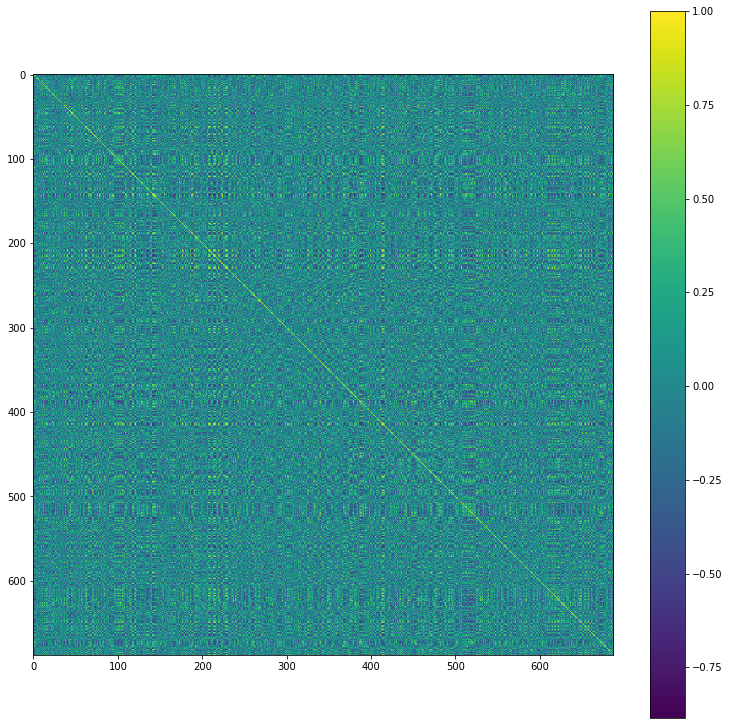

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(cosine_similarity(X_tn_std))
plt.colorbar()

In [61]:
# 둘만 하고싶다면 [0][1] 이런식으로 행 번호를 적어준다.

cosine_similarity(X_tn_std)[0][1]

-0.14511224424306784

In [62]:
cosine_similarity([X_tn_std[0], X_tn_std[1]])

array([[ 1.        , -0.14511224],
       [-0.14511224,  1.        ]])

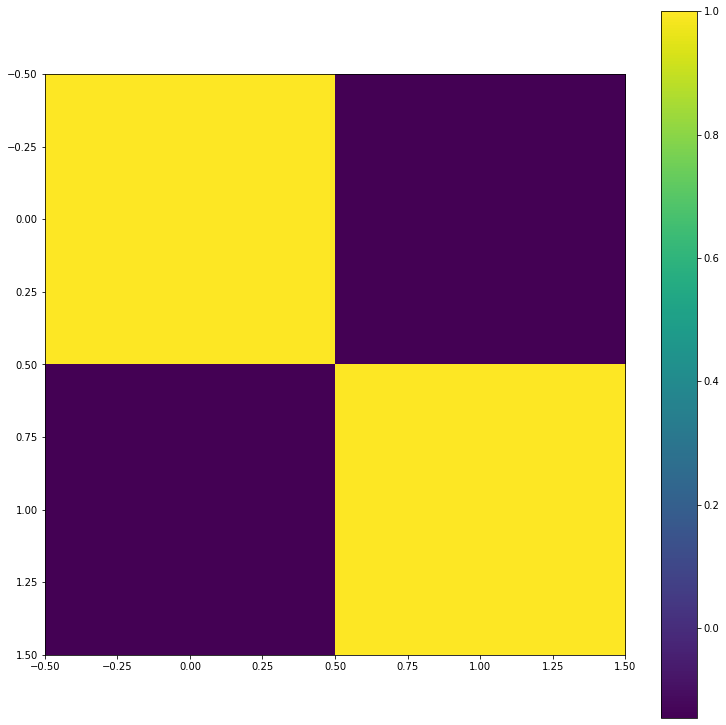

In [63]:
plt.figure(figsize = (13,13))
plt.imshow(cosine_similarity([X_tn_std[0], X_tn_std[1]]))
plt.colorbar()